In [32]:
import pandas as pd 
import seaborn as sns

In [33]:
df = pd.read_csv("salida.csv")
df["NroComponentes"] = df["Filas"] * df["Columnas"] 
df.drop(["Filas", "Columnas"], axis=1, inplace=True)
df

,NroThreads,Tiempo,NroComponentes
0,1,0.935603,250000
1,1,2.576133,490000
2,1,5.603391,810000
3,1,10.369847,1210000
4,1,17.773701,1690000
5,2,0.888852,250000
6,2,2.532430,490000
7,2,5.582880,810000
8,2,10.375475,1210000
9,2,17.787602,1690000


In [34]:
dfSec = df.loc[df["NroThreads"] == 1].copy()
dfSec.drop("NroThreads", axis=1, inplace=True)
dfPar = df.loc[df["NroThreads"] != 1].copy()
dfSec
dfPar

# dfPar["Speedup"] = dfSec.loc[dfSec[["Filas", "Columnas"]] == dfPar[["Filas", "Columnas"]]]["Tiempo"] / dfPar["Tiempo"]

,NroThreads,Tiempo,NroComponentes
5,2,0.888852,250000
6,2,2.532430,490000
7,2,5.582880,810000
8,2,10.375475,1210000
9,2,17.787602,1690000
10,3,0.888885,250000
11,3,2.540123,490000
12,3,5.580274,810000
13,3,10.607207,1210000
14,3,18.144737,1690000


In [35]:
dfMerged = dfPar.merge(dfSec, how="inner", on="NroComponentes", suffixes=["_par", "_sec"])

In [36]:
dfMerged["Speedup"] = dfMerged["Tiempo_sec"] / dfMerged["Tiempo_par"]

In [37]:
dfMerged

,NroThreads,Tiempo_par,NroComponentes,Tiempo_sec,Speedup
0,2,0.888852,250000,0.935603,1.052597
1,3,0.888885,250000,0.935603,1.052558
2,4,1.099634,250000,0.935603,0.850831
3,2,2.532430,490000,2.576133,1.017257
4,3,2.540123,490000,2.576133,1.014176
5,4,3.178964,490000,2.576133,0.810369
6,2,5.582880,810000,5.603391,1.003674
7,3,5.580274,810000,5.603391,1.004143
8,4,6.612402,810000,5.603391,0.847406
9,2,10.375475,1210000,10.369847,0.999458


<Axes: xlabel='NroComponentes', ylabel='Speedup'>

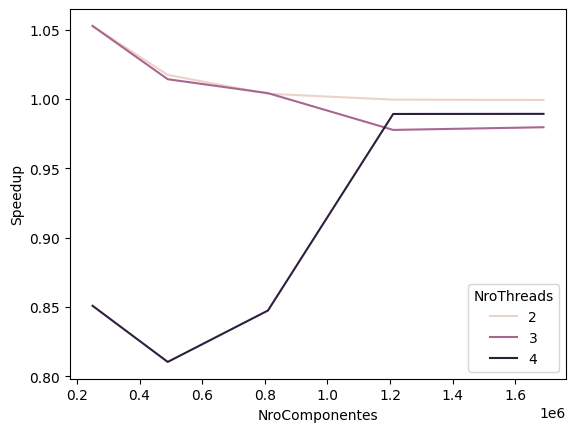

In [38]:
sns.lineplot(dfMerged, x="NroComponentes", y="Speedup", hue="NroThreads")